<a href="https://colab.research.google.com/github/sureyakkus/Yorumlar-zerinden-Restoran-Performans-n-n-Hedef-ve-Polarite-Bazl-Analizi/blob/main/DD%C4%B0odev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Yorumlar Üzerinden Restoran Performansının Hedef ve Polarite Bazlı Analizi


** DERLEM ÖZELLİKLERİ**

Seçtiğim derlem http://metashare.ilsp.gr:8080/repository/download/ff5dad70676311e5bf9c842b2b6a04d71fa7fa3ba4504a228dafe0c24560585b/ (SemEval-2016 ABSA Restaurant Reviews-Turkish: Train Data (Subtask 1))
İTU Doğal Dil İşleme grubu tarafından 2016 yılında restoran değerlendirmelerine ait toplamda 1317 cümleden içeren 320 tane döküman kullanılarak oluşturulmuştur.
Bu veri seti xml dosya formatı kullanılarak oluşturulmuştur.

** 1. ÇALIŞMANIN AMACI ve HEDEFİ**

Çalışmanın Amacı

Bu çalışmanın amacı, restoran yorumlarını analiz ederek hedef kategoriler (örneğin, servis, yemek, ambiyans) ve polarite (örneğin, olumlu, olumsuz, nötr) bazlı olarak restoran performansının genel bir resmini çıkarmaktır.Bu çalışmayla eğitilen model aynı zamanda restoran hakkında gelen yeni bir yorumun ait olabileceği hedef kategori ve polarite sınıflandırmasını duygu analizi ile yapabilmektedir


**2. Yöntem**

Çalışma kodlar ve metin satırlarını bir arada bulundurabilmesi özelliğinden dolayı Google Colab ile gerçekleştirilmiştir. Bir python not defteri oluşturularak her adım üzerinde açıklama yapılarak anlatılmıştır.
 sklearn kütüphanesi ile Büyük/küçük harf dönüşümü, noktalama işareti temizleme, stop words (Türkçe durak kelimeler) filtreleme gibi doğal dil işleme adımları yapılmıştır.Metinler, TF-IDF vektörizasyonuyla sayısal forma dönüştürülmüştür. Model RandomForest makine öğrenme modeli kullanılarak geliştirilmiştir. Veri okuma ve ön işleme aşamaları pandas kütüphanesi ile gerçekleştirilmiştir. python xml kütüphanesi ile google colab'a yüklediğimiz xml dosyasını açılıp, satır satır okunmuş ve İçindeki hali hazırda etiketlenmiş veriler bir dataframe'e  aktarılmıştır.

**2.1. Veri Okuma ,Data Frame oluşturma ve Veri Anlamlandırma**

 Veri okuma ve ön işleme aşamaları pandas kütüphanesi ile gerçekleştirilmiştir. python xml kütüphanesi ile google colab'a yüklediğimiz xml dosyasını açıp, satır satır okuyoruz. İçindeki hali hazırda etiketlenmiş verileri bir dataframe e aktarıyoruz.

Veri setinde veriler Text - Target - Category - Polarity olmak üzere 4 sütuna ayrılmıştır.
Text: Restoran hakkında yapılan yorum cümlesi.
Target: Yorumu ilgilendiren bölüm.
Category: Metinde bahsedilen hedefin nasıl daha geniş bir sınıfa dahil olduğunu belirtir.
Polarity: Metnin duygusunu ifade eden bölümdür.








In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

# XML dosyasını yükle
tree = ET.parse('reviews.xml')  # Dosya adını kendi dosyanıza göre değiştirin
root = tree.getroot()

# Veriyi saklamak için boş bir liste
data = []

# XML'den veri çekme
for review in root.findall('Review'):
    review_id = review.get('rid')
    for sentence in review.find('sentences').findall('sentence'):
        sentence_id = sentence.get('id')
        text_element = sentence.find('text')
        text = text_element.text if text_element is not None else ""

        # Opinions kontrolü
        opinions_element = sentence.find('Opinions')
        if opinions_element is not None:
            for opinion in opinions_element.findall('Opinion'):
                target = opinion.get('target')
                category = opinion.get('category')
                polarity = opinion.get('polarity')
                data.append({
                    'Review ID': review_id,
                    'Sentence ID': sentence_id,
                    'Text': text,
                    'Target': target,
                    'Category': category,
                    'Polarity': polarity
                })


# Listeyi DataFrame'e çevir
df = pd.DataFrame(data)

# DataFrame'i kontrol et
print(df.head())


  Review ID Sentence ID                                               Text  \
0      1000      1000:0            Manzara sahane evet ama servis rezalet.   
1      1000      1000:0            Manzara sahane evet ama servis rezalet.   
2      1000      1000:1  Soguk su isteyince, soguk yok, butun sulari di...   
3      1000      1000:1  Soguk su isteyince, soguk yok, butun sulari di...   
4      1000      1000:2  Yemekler iyi hos, lezzetler iyi ama heyecan ve...   

      Target            Category  Polarity  
0     servis     SERVICE#GENERAL  negative  
1    Manzara    AMBIENCE#GENERAL  positive  
2    mezenin  FOOD#STYLE_OPTIONS  negative  
3     garson     SERVICE#GENERAL  negative  
4  lezzetler        FOOD#QUALITY  positive  


**2.1.1. Veri Setinin Kontrol Edilmesi**

Veri seti ile ilgili genel bilgileri, veri setinden örnek bazı satırları ve veri setinde eksik değer olup olmadığının kontrolünü yapıyoruz


In [ ]:
# Veri setinin genel bilgisi
print("Veri Seti Bilgisi:")
print(df.info())

# İlk birkaç satırı görüntüle
print("\nVeri Setinden Örnek Satırlar:")
print(df.head())

# Eksik değerlerin kontrolü
print("\nEksik Değer Sayıları:")
print(df.isnull().sum())


Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1535 non-null   object
 1   Sentence ID  1535 non-null   object
 2   Text         1535 non-null   object
 3   Target       1535 non-null   object
 4   Category     1535 non-null   object
 5   Polarity     1535 non-null   object
dtypes: object(6)
memory usage: 72.1+ KB
None

Veri Setinden Örnek Satırlar:
  Review ID Sentence ID                                               Text  \
0      1000      1000:0            Manzara sahane evet ama servis rezalet.   
1      1000      1000:0            Manzara sahane evet ama servis rezalet.   
2      1000      1000:1  Soguk su isteyince, soguk yok, butun sulari di...   
3      1000      1000:1  Soguk su isteyince, soguk yok, butun sulari di...   
4      1000      1000:2  Yemekler iyi hos, lezzetler iyi ama heyecan ve...   

 


**2.1.2. Verilerin Görselleştirilmesi**

Restoran hakkında yapılan yorumların kategorilere, polaritelerine göre ve Kategorilerin polaritelerine göre dağılımlarını grafiklerle görselleştirerek restoran hakkında genel kanıyı belirlemeye çalışıyoruz


In [ ]:
# Kategorilere göre yorum sayıları
kategori_sayilari = df['Category'].value_counts()
print("\nKategorilere Göre Yorum Sayıları:")
print(kategori_sayilari)

# Polaritelere göre yorum sayıları
polarite_sayilari = df['Polarity'].value_counts()
print("\nPolaritelere Göre Yorum Sayıları:")
print(polarite_sayilari)

# Kategorilere göre polarite dağılımı
kategori_polarite = df.groupby(['Category', 'Polarity']).size().reset_index(name='Count')
print("\nKategorilere Göre Polarite Dağılımı:")
print(kategori_polarite)



Kategorilere Göre Yorum Sayıları:
Category
FOOD#QUALITY                446
AMBIENCE#GENERAL            277
SERVICE#GENERAL             235
RESTAURANT#GENERAL          228
FOOD#STYLE_OPTIONS          123
RESTAURANT#PRICES            65
DRINKS#QUALITY               51
LOCATION#GENERAL             39
FOOD#PRICES                  31
DRINKS#STYLE_OPTIONS         30
DRINKS#PRICES                 9
RESTAURANT#MISCELLANEOUS      1
Name: count, dtype: int64

Polaritelere Göre Yorum Sayıları:
Polarity
positive    820
negative    586
neutral     129
Name: count, dtype: int64

Kategorilere Göre Polarite Dağılımı:
                    Category  Polarity  Count
0           AMBIENCE#GENERAL  negative     63
1           AMBIENCE#GENERAL   neutral     10
2           AMBIENCE#GENERAL  positive    204
3              DRINKS#PRICES  negative      8
4              DRINKS#PRICES   neutral      1
5             DRINKS#QUALITY  negative      9
6             DRINKS#QUALITY   neutral      3
7             DRINKS#Q

<ipython-input-12-2ff69ae59091>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_sayilari.index, y=kategori_sayilari.values, palette='viridis')


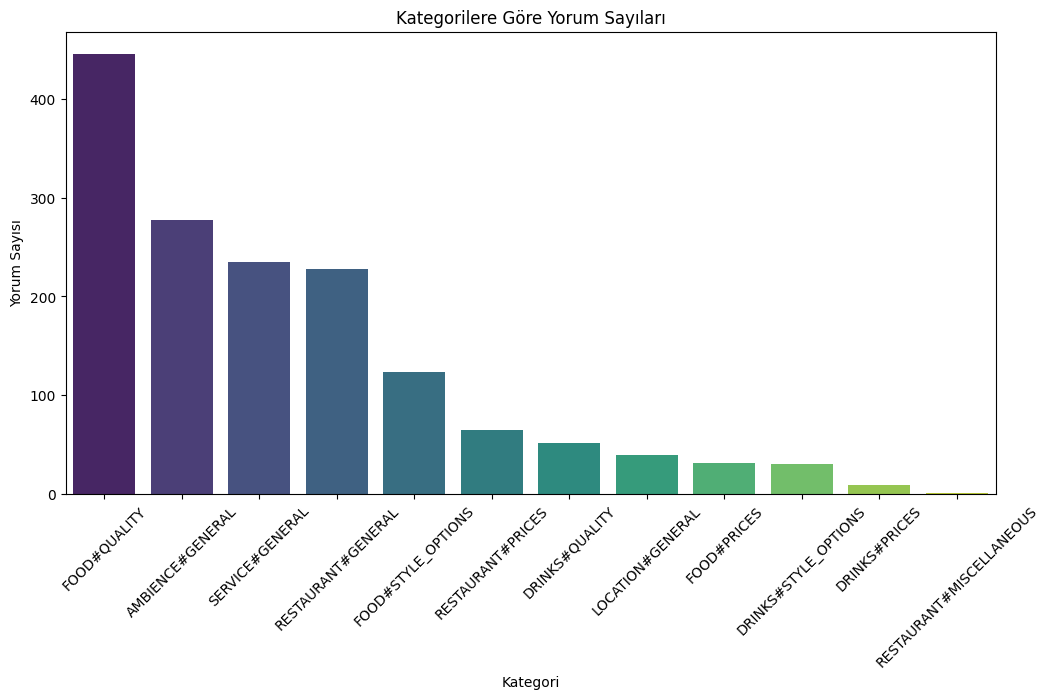

<ipython-input-12-2ff69ae59091>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=polarite_sayilari.index, y=polarite_sayilari.values, palette='coolwarm')


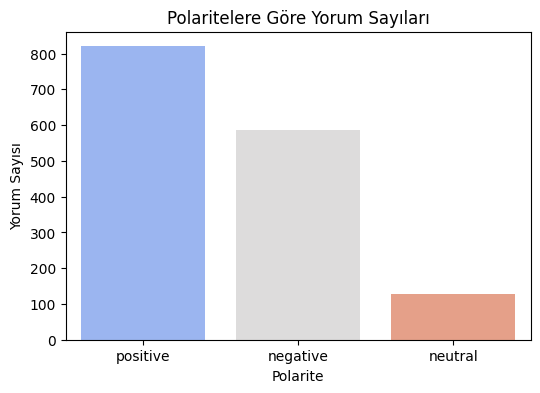

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kategorilere göre yorum sayıları görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(x=kategori_sayilari.index, y=kategori_sayilari.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Kategorilere Göre Yorum Sayıları")
plt.xlabel("Kategori")
plt.ylabel("Yorum Sayısı")
plt.show()

# Polaritelere göre yorum sayıları görselleştirme
plt.figure(figsize=(6, 4))
sns.barplot(x=polarite_sayilari.index, y=polarite_sayilari.values, palette='coolwarm')
plt.title("Polaritelere Göre Yorum Sayıları")
plt.xlabel("Polarite")
plt.ylabel("Yorum Sayısı")
plt.show()


**2.2 Kategori Tahmini ve Duygu Analizi İçin En Önemli Özellikler Çıkarımı**

Bu bölümde pandas, numpy,sklearn gibi kütüphaneleri kullanarak xml dosya formatında olan dosyadan verileri okuyup , veri setindeki eksik değerleri temizleyip veri setini eğitim ve test için ayırıyoruz.

Target ve Polarity etiketlerini sayısal hale getirdikten sonra eğitim ve test veri setlerini oluşturuyoruz.



In [1]:
import pandas as pd


# xml formatında oluşturulan veri seti dosyasından verileri okuyoruz
import xml.etree.ElementTree as ET

tree = ET.parse('reviews.xml')  # XML dosyanızın yolunu doğru verin
root = tree.getroot()

data = []
for review in root.findall('Review'):
    review_id = review.get('rid')
    for sentence in review.findall('sentences/sentence'):
        sentence_id = sentence.get('id')
        text = sentence.find('text').text if sentence.find('text') is not None else None

        # 'Opinions' etiketi mevcut mu kontrol et
        opinions = sentence.find('Opinions')
        if opinions is not None:
            for opinion in opinions.findall('Opinion'):
                target = opinion.get('target')
                category = opinion.get('category')
                polarity = opinion.get('polarity')
                data.append({
                    'Review ID': review_id,
                    'Sentence ID': sentence_id,
                    'Text': text,
                    'Target': target,
                    'Category': category,
                    'Polarity': polarity
                })


# Veri çerçevesini oluştur
df = pd.DataFrame(data)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Eksik değerleri temizle
df = df.dropna(subset=['Text', 'Target', 'Polarity'])

# Veri kümesini eğitim ve test için ayır
X = df['Text']
y_category = df['Target']
y_polarity = df['Polarity']

# Target ve Polarity etiketlerini sayısal hale getirme
le_category = LabelEncoder()
y_category_encoded = le_category.fit_transform(y_category)

le_polarity = LabelEncoder()
y_polarity_encoded = le_polarity.fit_transform(y_polarity)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_category_encoded, test_size=0.2, random_state=42)
_, _, y_pol_train, y_pol_test = train_test_split(X, y_polarity_encoded, test_size=0.2, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: 'reviews.xml'




TF-IDF yöntemi, metin verisini sayısal hale getirmek için kullanılır. Bununla birlikte, kategorileri (Target) ve duygu analizini (Polarity) sınıflandırmak için makine öğrenmesi modelleri kullanacağız.

**2.2.1. Metin Temizleme:**

Büyük/küçük harf dönüşümü, noktalama işareti temizleme, stop words (Türkçe durak kelimeler) filtreleme.

**2.2.2. TF-IDF Özellik Çıkarımı:**

Metinler, TF-IDF vektörizasyonuyla sayısal forma dönüştürüldü.

**2.2.3. Veri Ayrıştırma**

Yorumlar:

Eğitim (%80) ve test (%20) olarak ikiye ayrıldı.

Etiketler:

Target ve Polarity etiketleri sayısal hale getirildi (Label Encoding).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Türkçe Stop Words Listesi
turkish_stop_words = [
    "bir", "ve", "ama", "bu", "çok", "de", "da", "için", "gibi", "ile",
    "ki", "ben", "sen", "o", "biz", "siz", "onlar", "biraz", "bazı",
    "çünkü", "daha", "en", "hem", "her", "hiç", "kadar", "sadece",
    "şey", "veya", "yani", "zaten"
]

# TF-IDF Vektörleştirme
tfidf = TfidfVectorizer(max_features=5000, stop_words=turkish_stop_words)
X = tfidf.fit_transform(df['Text']).toarray()

# Etiketlerin Sayısal Hale Getirilmesi
le_category = LabelEncoder()
y_category = le_category.fit_transform(df['Target'])

le_polarity = LabelEncoder()
y_polarity = le_polarity.fit_transform(df['Polarity'])

# Veri kümesini eğitim ve test setlerine ayırma
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_category, test_size=0.2, random_state=42)
_, _, y_pol_train, y_pol_test = train_test_split(X, y_polarity, test_size=0.2, random_state=42)

print("Eğitim ve test setleri başarıyla hazırlandı!")


Eğitim ve test setleri başarıyla hazırlandı!


**2.2.4. Modelleme**

Kullanılan Modeller:

RandomForestClassifier:

Hem hedef kategorileri tahmin etmek hem de duygu analizini yapmak için kullanıldı.

Model Eğitimi:

Ayrıştırılmış eğitim verisi kullanılarak modeller eğitildi.

Model Testi ve Doğruluğunun Ölçülmesi:

Test verisi kullanılarak model performansı (örneğin, doğruluk, karışıklık matrisi) değerlendirildi.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Kategori Tahmini için Model
category_model = RandomForestClassifier(random_state=42)
category_model.fit(X_train, y_cat_train)
y_cat_pred = category_model.predict(X_test)

# Performans Raporu
print("Kategori Tahmini Performansı:")
print(classification_report(y_cat_test, y_cat_pred))
print(f"Doğruluk: {accuracy_score(y_cat_test, y_cat_pred)}")

# Duygu Analizi Tahmini için Model
polarity_model = RandomForestClassifier(random_state=42)
polarity_model.fit(X_train, y_pol_train)
y_pol_pred = polarity_model.predict(X_test)

# Performans Raporu
print("\nDuygu Analizi Tahmini Performansı:")
print(classification_report(y_pol_test, y_pol_pred))
print(f"Doğruluk: {accuracy_score(y_pol_test, y_pol_pred)}")


Kategori Tahmini Performansı:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          53       1.00      1.00      1.00         1
          54       0.00      0.00      0.00         0
          55       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Duygu Analizi Tahmini Performansı:
              precision    recall  f1-score   support

           0       0.66      0.32      0.43       115
           1       0.70      0.28      0.40        25
           2       0.62      0.89      0.73       167

    accuracy                           0.63       307
   macro avg       0.66      0.50      0.52       307
weighted avg       0.64      0.63      0.59       307

Doğruluk: 0.6286644951140065


**2.2.5 Sonuçların Grafikleştirilmesi**

Hedef Kategoriler:

Hedef kategoriler için özellik önem değerleri görselleştirildi.

En önemli kelimeler bar grafiği ile sunuldu.

Polarity (Duygu Analizi):

Duygu analizi için en önemli kelimeler bar grafiği şeklinde gösterildi.

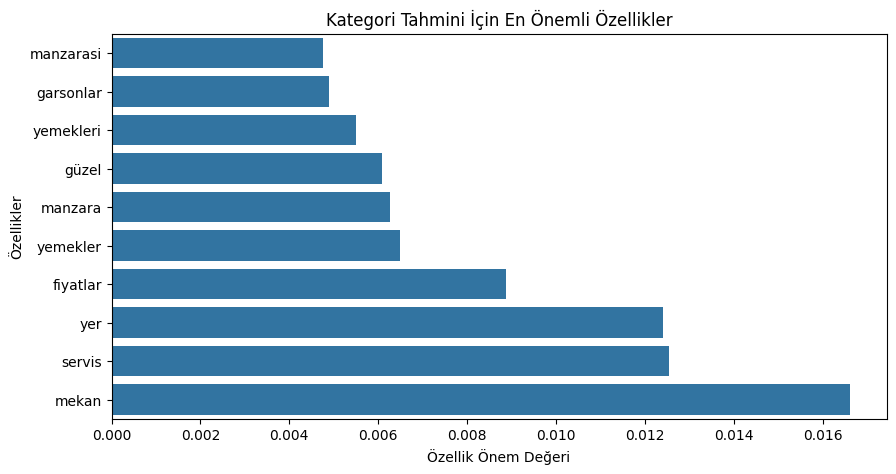

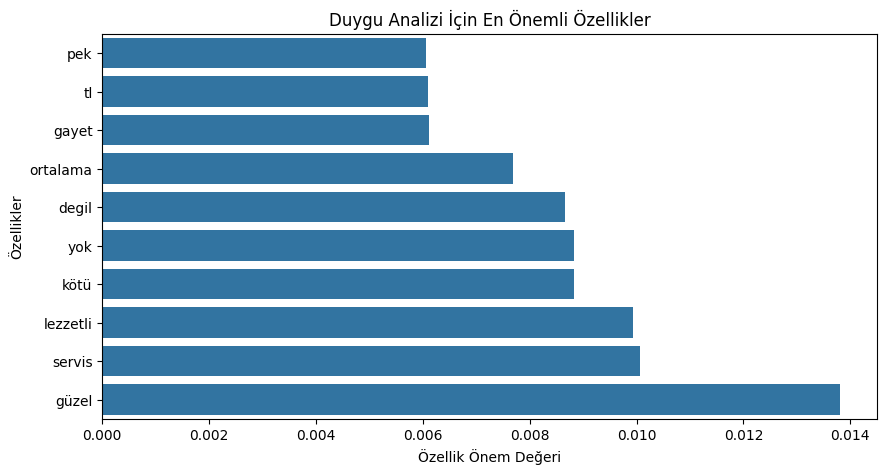

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Özellik isimlerini alın
feature_names = tfidf.get_feature_names_out()

# Hedef Kategoriler için
category_importances = category_model.feature_importances_
sorted_idx = np.argsort(category_importances)[-10:]  # En önemli 10 özelliği seç
plt.figure(figsize=(10, 5))
sns.barplot(
    x=category_importances[sorted_idx],
    y=np.array(feature_names)[sorted_idx]
)
plt.title("Kategori Tahmini İçin En Önemli Özellikler")
plt.xlabel("Özellik Önem Değeri")
plt.ylabel("Özellikler")
plt.show()

# Polarity için
polarity_importances = polarity_model.feature_importances_
sorted_idx = np.argsort(polarity_importances)[-10:]  # En önemli 10 özelliği seç
plt.figure(figsize=(10, 5))
sns.barplot(
    x=polarity_importances[sorted_idx],
    y=np.array(feature_names)[sorted_idx]
)
plt.title("Duygu Analizi İçin En Önemli Özellikler")
plt.xlabel("Özellik Önem Değeri")
plt.ylabel("Özellikler")
plt.show()



**2.3. Yeni Bir Yorum İçin hedef Kategori ve Duygu Sınıflandırması**

Örnek cümleler oluşturuldu ve modelin tahminleri değerlendirildi.

Girdi: "Yemekler çok güzeldi ama servis çok yavaş olduğu için memnun kalmadım"

Model Çıktısı:

Tahmin Edilen Kategori:yemekler

Tahmin Edilen Polarite: negative

In [ ]:
# Yeni bir yorum örneği
new_comment = ["Yemekler çok güzeldi ama servis çok yavaş olduğu için memnun kalmadım"]
new_comment_tfidf = tfidf.transform(new_comment).toarray()

# Tahminler
predicted_category = le_category.inverse_transform(category_model.predict(new_comment_tfidf))
predicted_polarity = le_polarity.inverse_transform(polarity_model.predict(new_comment_tfidf))

print(f"Tahmin Edilen Kategori: {predicted_category[0]}")
print(f"Tahmin Edilen Polarite: {predicted_polarity[0]}")


Tahmin Edilen Kategori: yemekler
Tahmin Edilen Polarite: negative
